In [1]:
import matplotlib
#%matplotlib tk
%autosave 180
%load_ext autoreload
%autoreload 2

import nest_asyncio
%config Completer.use_jedi = False

#
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 
import numpy as np
import os
import scipy

# add root directory to be able to import packages
# todo: make all packages installable so they can be called/imported by environment
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from utils.calcium import calcium


Autosaving every 180 seconds


/home/cat/code/donatolab/manifolds/utils/animal_database/animal_database.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# of correlations computed:  211600
cell a, cell b,  Pcorr,  Pval
[ 0.          1.         -0.08519824  0.        ]
# cells:  460


100%|███████████████████████████████████████████████████████████████████████████████████████| 211600/211600 [00:00<00:00, 522906.29it/s]


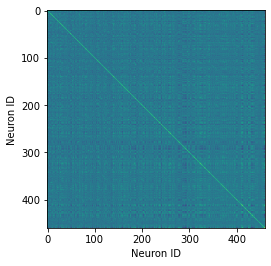

In [2]:
##################################################################
################ LOAD PAIRWISE CORRELATION FILE ##################
##################################################################
root_dir = '/media/cat/4TB1/donato/'
animal_id = 'DON-006084'
session = '20210521'

#
fname_cell_corr = os.path.join(root_dir, animal_id, session, 'suite2p','plane0','cell_correlations.npy')

#
data = np.load(fname_cell_corr)
print ("# of correlations computed: ", len(data))
print ("cell a, cell b,  Pcorr,  Pval")
print (data[1])

# make correlation matrix
n_cells = np.unique(data[:,0]).shape[0]
print ("# cells: ", n_cells)

#
from tqdm import trange
corr_matrix = np.zeros((n_cells,
                        n_cells))

#
for q in trange(len(data)):
    corr_matrix[int(data[q][0]),int(data[q][1])] = data[q][2]

fig=plt.figure()
plt.imshow(corr_matrix)
plt.xlabel("Neuron ID")
plt.ylabel("Neuron ID")
plt.show()

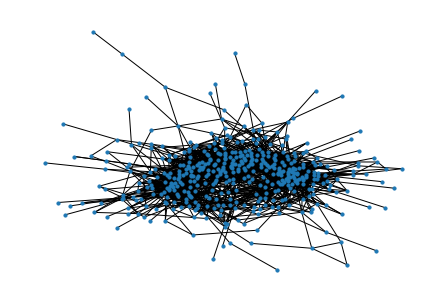

In [3]:
#####################################################################
########### GENERATE GRAPHS BASED ON CORRELATION THRESHOLD ##########
#####################################################################
#

def get_network_connectivity_matrix(corr_matrix,
                                   threshold=0.3):
    #
    idx1 = np.where(corr_matrix>=threshold)
    idx2 = np.where(corr_matrix<threshold)

    #
    net_matrix = corr_matrix.copy()
    net_matrix[idx1] = 1
    net_matrix[idx2] = 0
    np.fill_diagonal(net_matrix, 0)
    
    return net_matrix

# 
threshold = 0.3
network_matrix = get_network_connectivity_matrix(corr_matrix,
                                                 threshold)

import networkx as nx

#
G = nx.from_numpy_matrix(network_matrix)
G.remove_nodes_from(list(nx.isolates(G)))


#
node_sizes = 10
nx.draw(G, node_size = node_sizes)
plt.show()
